In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [2]:
dfs = [pd.read_csv('user_' + user + '.csv') for user in ['a','b','c','d']]

In [3]:
for i in range(len(dfs)):
    dfs[i]['User'] = pd.Series(i, index=dfs[i].index)

In [4]:
data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

data


,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User
0,0.0,3575.001413,2067.069485,1.100858,2.434076,0.543417,2.021302,2.553511,2.365487,3568.869690,...,2.039709,3573.533259,2064.975048,0.761069,2.073592,0.261481,1.063716,2.166494,1.885875,0
1,0.0,3573.472842,2065.800686,1.090318,3.227924,0.648712,2.059264,2.774706,3.411464,3575.626827,...,9.331080,3580.290004,2079.580199,0.407036,4.721191,1.604364,2.884035,1.414675,2.954279,1
2,2.0,3574.983768,2065.875038,1.907066,3.382158,1.549094,2.302073,2.396191,3.876850,3576.225454,...,6.201022,3585.648095,2078.434125,2.326482,3.208700,0.725349,1.448075,0.950014,2.020696,1
3,0.0,3572.080889,2062.954256,1.208711,2.185933,0.527516,1.383347,1.491573,2.038180,3563.766670,...,1.798504,3569.509367,2062.287309,1.500673,2.816629,0.505014,1.382074,1.489048,2.270938,2
4,1.0,3573.534709,2065.113750,0.855827,1.172306,0.528934,0.849275,2.082744,2.229527,3568.692097,...,1.663012,3573.903622,2064.162117,0.645148,1.849567,1.120343,1.371170,1.359754,1.902640,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2.0,3569.816065,2064.256275,1.159745,2.601396,0.792874,1.398193,0.893148,1.757888,3562.795598,...,2.229643,3567.598599,2061.716118,1.206217,2.178799,0.996849,2.414660,1.133285,1.904587,2
8636,1.0,3571.552090,2062.816733,0.848895,1.656839,0.829219,1.522172,1.348889,2.943499,3564.450695,...,2.214043,3570.155457,2062.594641,2.122560,3.098691,0.796147,2.367273,1.458096,2.404202,2
8637,0.0,3571.804672,2064.692984,0.537253,2.528020,0.787340,1.793262,2.764398,3.844259,3572.500322,...,13.131767,3586.494094,2079.889779,1.264305,3.406159,0.766959,4.300380,1.355594,2.885730,1
8638,0.0,3566.836591,2061.201192,0.382628,1.410153,0.620024,1.488091,2.036828,2.512457,3573.635671,...,1.499659,3569.218561,2062.246786,0.756692,1.321790,0.173517,1.044779,1.327151,2.150542,0


In [5]:
# data = data[data.columns.drop(list(data.filter(regex='beta')))]
# data

In [6]:
# data = data[data.columns.drop(list(data.filter(regex='alpha')))]

In [7]:
# data = data[data.columns.drop(list(data.filter(regex='delta')))]

In [8]:
# data = data[data.columns.drop(list(data.filter(regex='theta')))]

In [9]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [10]:
def preprocess_inputs(df, target='Class'):
    df = df.copy()
    
    # One-hot encode whichever target column is not being used
    targets = ['Class', 'User']
    targets.remove(target)
    df = onehot_encode(df, column=targets[0])
    
    # Split df into X and y
    y = df[target].copy()
    X = df.drop(target, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test
 

In [11]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, target='Class')

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [13]:
print(model.feature_importances_)

[0.01600761 0.01284147 0.00643718 0.01017139 0.00624375 0.00777691
 0.01079617 0.00942326 0.01308353 0.01145839 0.00722069 0.00890407
 0.0061136  0.00703364 0.0086498  0.00964904 0.00644063 0.00799546
 0.00582282 0.00648113 0.00640994 0.0061077  0.00841262 0.00795975
 0.00944324 0.00954237 0.00570105 0.00636728 0.00645004 0.00688583
 0.00950782 0.00883007 0.01139134 0.01062781 0.0051893  0.00515718
 0.00615617 0.0063549  0.00982841 0.00890729 0.00748871 0.00751867
 0.00543304 0.00520242 0.00652739 0.00587432 0.00887    0.00750525
 0.01036231 0.00911984 0.00612891 0.0070401  0.00647301 0.00755674
 0.01178144 0.01426659 0.02200379 0.02121222 0.00776366 0.01017671
 0.00624292 0.00897919 0.01309063 0.02165434 0.01635052 0.01354162
 0.00650367 0.00759609 0.00701604 0.00810407 0.00893425 0.0129242
 0.00814471 0.00774059 0.00641845 0.00737621 0.00747911 0.00832414
 0.00812328 0.00885896 0.01425972 0.01343707 0.00587988 0.00683973
 0.00672087 0.00851476 0.0104161  0.00913781 0.01094002 0.00999

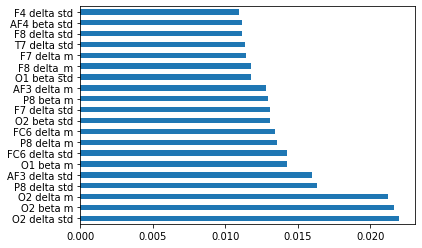

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [15]:
def build_model(num_classes=3):
    
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    x = tf.keras.layers.Dense(128, activation='relu')(inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [16]:
class_model = build_model(num_classes=3)

class_history = class_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
173/173 [==============================] - 2s 5ms/step - loss: 1.0579 - accuracy: 0.4346 - val_loss: 1.0111 - val_accuracy: 0.4649
Epoch 2/50
173/173 [==============================] - 1s 5ms/step - loss: 0.9276 - accuracy: 0.5491 - val_loss: 0.9657 - val_accuracy: 0.5293
Epoch 3/50
173/173 [==============================] - 1s 4ms/step - loss: 0.8489 - accuracy: 0.6095 - val_loss: 0.9027 - val_accuracy: 0.5691
Epoch 4/50
173/173 [==============================] - 0s 3ms/step - loss: 0.7755 - accuracy: 0.6574 - val_loss: 0.8691 - val_accuracy: 0.5864
Epoch 5/50
173/173 [==============================] - 1s 4ms/step - loss: 0.7124 - accuracy: 0.6949 - val_loss: 0.9009 - val_accuracy: 0.5604
Epoch 6/50
173/173 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.7245 - val_loss: 0.8625 - val_accuracy: 0.6052
Epoch 7/50
173/173 [==============================] - 1s 4ms/step - loss: 0.5868 - accuracy: 0.7584 - val_loss: 0.8158 - val_accuracy: 0.6341
Epoch 

In [17]:
class_acc = class_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy (Class Model): {:.2f}%".format(class_acc * 100))

Test Accuracy (Class Model): 66.49%
